## Aprendizado Não Supervisionado - Agrupamento de Dados
#### Prof. Thomas da Silva Paula

## Implementar K-means simples do zero

### Descrição

Implementar uma versão simples do K-means do zero. Por simples, deve-se entender que nenhuma das otimizações do K-means precisa ser implementada. Assume-se que deverá ser criada uma função que receba como parâmetros o número de clusters `k`, o conjunto de dados em formato Numpy `X`, e um parâmetro `random_state`, retornando os centróides finais e os labels. Os centróides devem ser um Numpy array e os labels devem ser uma lista, onde cada elemento é um inteiro representando o cluster.

```python
def do_kmeans_clustering(k, X, random_state):
  # seu código aqui
  return centroids, final_clusters
```

### Requisitos

* Criar método com nome `do_kmeans_clustering`, que receba um parâmetro `k`, um parâmetro `X` e um parâmetro `random_state`, representando número de clusters, dados e inteiro a ser usado como seed (para função `random`), respectivamente.
* O método deve possuir dois retornos, sendo que o primeiro são os centróides e segundo são os grupos finais. O formato de retorno dos grupos finais é livre.
* Assuma que `X` terá shape `(num_instances, num_features)`, onde `n_features = 2`.
* Assuma que os centróides finais tenham shape `(k, num_features)`.
* Assuma que os clusters (labels) sejam uma lista de tamanho `num_instances`.
* A inicialização dos centróides dos clusters deve ser aleatória e baseada no `random_state`.
* O algoritmo deve executar até que os clusters não mudem. Portanto, não temos um número máximo de iterações.
* Deve conter ao menos um método de plot para verificar os grupos finais em relação aos dados.
* A base de dados usada é sintética e para tal deve ser utilizado o método `make_blobs` do `sklearn.datasets.sample_generator`

## Implementação

### Imports
Utilizar bibliotecas que achar mais pertinente. Lembre-se dos detalhes do matplotlib e do seaborn para utilizá-los em notebooks (ver outros notebooks da aula).

In [110]:
### escreva seu código aqui
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import time
from copy import deepcopy
#from sklearn import preprocessing
from scipy.spatial import distance

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

import math
import random

%matplotlib inline

plt.rcParams['figure.figsize'] = (14, 8)

sns.set(font_scale=2)

### Criar base de dados sintética
Utilizar o método `make_blobs` do ScikitLearn com os parâmetros já fornecidos. Informar `random_state` como `100`

In [111]:
centers = 3
n_features = 2
n_samples = 300

### escreva seu código aqui

X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=n_features,
                  random_state=100)

df = pd.DataFrame(X, columns=['valoresX', 'valoresY'])
df['label'] = y

df.head()

,valoresX,valoresY,label
0,-10.484464,-7.967902,2
1,-3.390763,7.077865,1
2,-10.357295,-8.706160,2
3,-8.150449,-7.964183,2
4,-9.039564,-6.777323,2


### Plotar a base de dados inicial
Dica: lembre-se que utilizamos o `sns.scatterplot` e utilizando o dataset como um Pandas dataframe. Caso tenham dúvidas, revise os notebooks da aula.

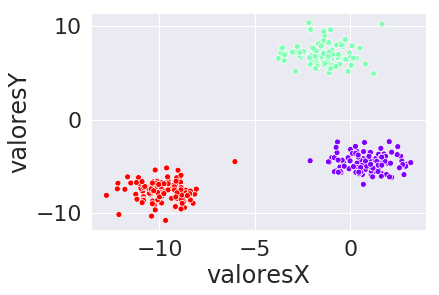

In [3]:
### escreva seu código aqui
_ = sns.scatterplot(x='valoresX', y='valoresY', data=df, hue='label', palette='rainbow', legend=False)

### K-means

In [144]:
def distancia_euclidiana(pontoA, pontoB):
    distancia = math.sqrt(math.pow(pontoA[0]-pontoB[0],2) + math.pow(pontoA[1]-pontoB[1],2))
    return np.float32(distancia)

def do_kmeans_clustering(k, X, random_state):
    random.seed(random_state)
    np.random.seed(random_state)
    X = np.array(X)
    
    data_copy_clusters = X.copy()
    data_copy_clusters = pd.DataFrame(data_copy_clusters)
    data_copy_clusters.insert(data_copy.shape[1],'cluster',0)

    # 1 Passo: Escolher K pontos aleatórios como sendo os centróides    
    centroX = np.random.randint(0, np.max(X), size=k)
    centroY = np.random.randint(0, np.max(X), size=k)
    centroids = np.array(list(zip(centroX, centroY)), dtype=np.float32)

    data_copy_clusters.at[0, 'cluster'] = -1
    data_copy_clusters

    diferente = True

    while diferente == True:
        
        data_copy_clusters_copy = data_copy_clusters.copy()
        data_copy_clusters_copy = pd.DataFrame(data_copy_clusters_copy)
        
        for index, row in data_copy.iterrows():
            ponto = [row[0], row[1]]
            distPC = 10000
            cluster = 0
            
            # 2 Passo: Atribuir para cada entrada do dataset o cluster mais próximo, calculando a distância 
            # (euclidiana) para cada centróide
            for i in range(k):
                cent = centroids[i]
                dist = distancia_euclidiana(ponto, cent)

                if dist < distPC:
                    distPC = dist
                    cluster = i

            data_copy_clusters.at[index, 'cluster'] = cluster

        # 3 Passo: Encontrar um novo centro do cluster, pegando a média dos pontos atribuídos
        for i in range(k):
            valsX = []
            valsY = []
            media = 0
            for index, row in data_copy_clusters.iterrows():
                ponto = [row[0], row[1]]
                if row['cluster'] == i:
                    valsX.append(ponto[0])
                    valsY.append(ponto[1])
            mediaX = np.mean(valsX)
            mediaY = np.mean(valsY)
            media = mediaX, mediaY
            centroids[i] = media

        # 4 Passo: Repetir os passos 2 e 3 até que nenhuma das atribuições do cluster seja alterada
        for i in range(len(data_copy_clusters)):
            diferente = False
            if data_copy_clusters['cluster'][i] != data_copy_clusters_copy['cluster'][i]:
                diferente = True
                break
            
    labels_ = np.array(data_copy_clusters['cluster'])
    cluster_centers_ = centroids
    
    return labels_, cluster_centers_

### Treinamento

Realizar treinamento com `k = 3` e `random_state = 30`.

In [145]:
### escreva seu código aqui
data_copy = df.copy()
data_copy.drop(columns='label', inplace=True)

def train(data, clusters=3, random_state=30):
    
    model = do_kmeans_clustering(k=clusters, X=data, random_state=random_state)
    
    return model

### Plotar grupos resultantes

Utilizar dois métodos: `sns.scatterplot` para os dados e `plt.scatter` para os centróides. Caso tenha dúvidas, revise os exemplos dos notebooks da aula.

In [153]:
### escreva seu código aqui
def plot(model):
    data_copy['cluster_labels'] = model[0]
    _ = sns.scatterplot(x='valoresX', 
                            y='valoresY', 
                            data=data_copy, 
                            hue='cluster_labels', 
                            palette='rainbow', 
                            legend=False)

    centroids = model[1]

    centroids_x = centroids[:,0]
    centroids_y = centroids[:,1]

    _ = plt.scatter(centroids_x, centroids_y, color='black', s=100)


Tempo (s): 2.0688626766204834


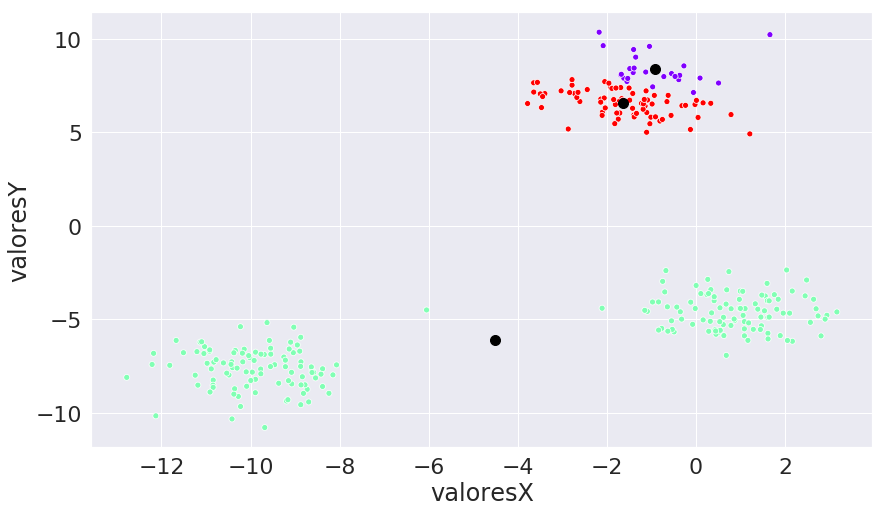

In [157]:
start = time.time()
clustering = train(df)
print('Tempo (s):', time.time() - start)

plot(clustering)

Tempo (s): 1.0338051319122314


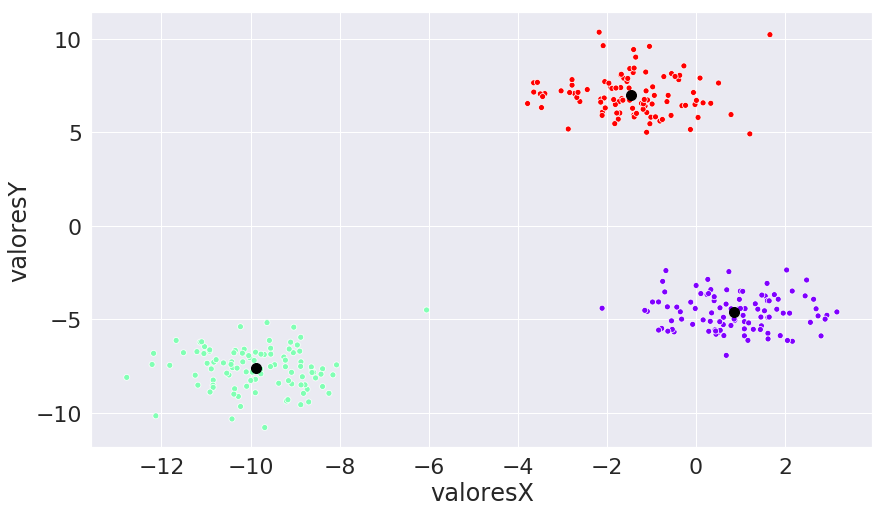

In [158]:
start = time.time()
clustering = train(data_copy, random_state = 45)
print('Tempo (s):', time.time() - start)

plot(clustering)

### Pergunta

Após finalizar a implementação, faça testes com diferentes valores para o `random_state`. O que você pode observar?

O que se observa é que quando o random_state fica entre os valores 45 e 50, os centroides ficam dentro dos clusters, qualquer outro valor, faz com que algum centroide fique fora do seu cluster. O tempo de execução durante as execuções é mais rápido quando o random_state está entre os valores 45 e 50.